## Moving trade from StatArb2 to StatArb

This was done because all of the implementation code was ready to go in the original StatArb framework, so I had to move the logic into a different "paradigm". I had to re-write a significant amount of code last December for implementation, and in the process the results had changed significantly, indicating that there was some bug in the process before the changes were made.

This analysis is to confirm that the before and after line up, which in fact they do this time.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManagerGCP
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
baseline = RunManagerGCP('StatArbStrategy2', 'run_0007', start_year=2010)
updated = RunManagerGCP('StatArbStrategy', 'run_0069', start_year=2010)

updated.import_return_frame()
baseline.import_return_frame()

### Overlay old with the new

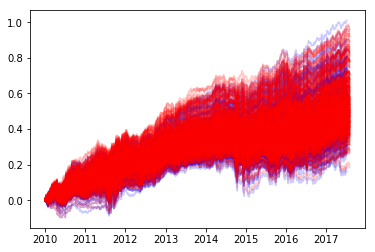

In [7]:
plt.figure()
plt.plot(baseline.returns.cumsum(), 'b', alpha=0.2)
plt.plot(updated.returns.cumsum(), 'r', alpha=0.2)
plt.show()

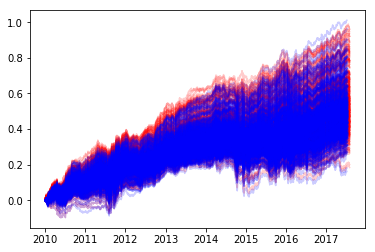

In [3]:
plt.figure()
plt.plot(updated.returns.cumsum(), 'r', alpha=0.2)
plt.plot(baseline.returns.cumsum(), 'b', alpha=0.2)
plt.show()

### Parameters should be approximately the same

In [4]:
baseline.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,126,0.513306,0.069321,-999.0
1,holding_period,5,126,0.523650,0.076481,-999.0
2,holding_period,7,126,0.499938,0.077508,-999.0
3,holding_period,9,126,0.485138,0.079257,-999.0
4,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",168,0.550715,0.084183,-999.0
5,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",168,0.552040,0.084143,-999.0
6,model,{u'type': u'reg'},168,0.413769,0.058599,-999.0
7,per_side_count,10,168,0.524683,0.063154,-999.0
8,per_side_count,20,168,0.510280,0.078573,-999.0
9,per_side_count,30,168,0.481562,0.085197,-999.0


In [5]:
updated.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,126,0.540438,0.072396,-999.0
1,holding_period,5,126,0.547092,0.079431,-999.0
2,holding_period,7,126,0.516836,0.079743,-999.0
3,holding_period,9,126,0.495443,0.080498,-999.0
4,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",168,0.555557,0.084256,-999.0
5,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",168,0.596292,0.090263,-999.0
6,model,{u'type': u'reg'},168,0.423008,0.059532,-999.0
7,per_side_count,10,168,0.548751,0.065769,-999.0
8,per_side_count,20,168,0.529820,0.081052,-999.0
9,per_side_count,30,168,0.496286,0.087230,-999.0


### Overlay a single hyperparameter model from before and after integration

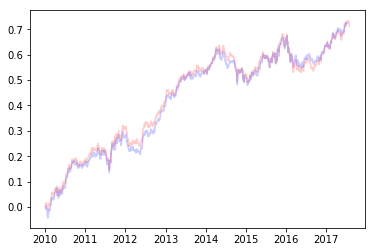

In [6]:
plt.figure()
plt.plot(updated.returns.iloc[:, 0].cumsum(), 'r', alpha=0.2)
plt.plot(baseline.returns.iloc[:, 0].cumsum(), 'b', alpha=0.2)
plt.show()